## 2 Non-negative matrix factorization


In [33]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import load_digits
from sklearn import decomposition

In [32]:
digits = load_digits()
X = digits["data"]/255.
Y = digits["target"]

### 2.1 Comparison of scikit-learn's NMF with SVD

### (i) SVD

In [116]:
u,s,vt = np.linalg.svd(X-np.mean(X,axis=0))

In [117]:
# base images
svd_basis = ((vt+np.mean(X,axis=0))[np.argsort(s)[-6:]]).reshape([6,8,8])

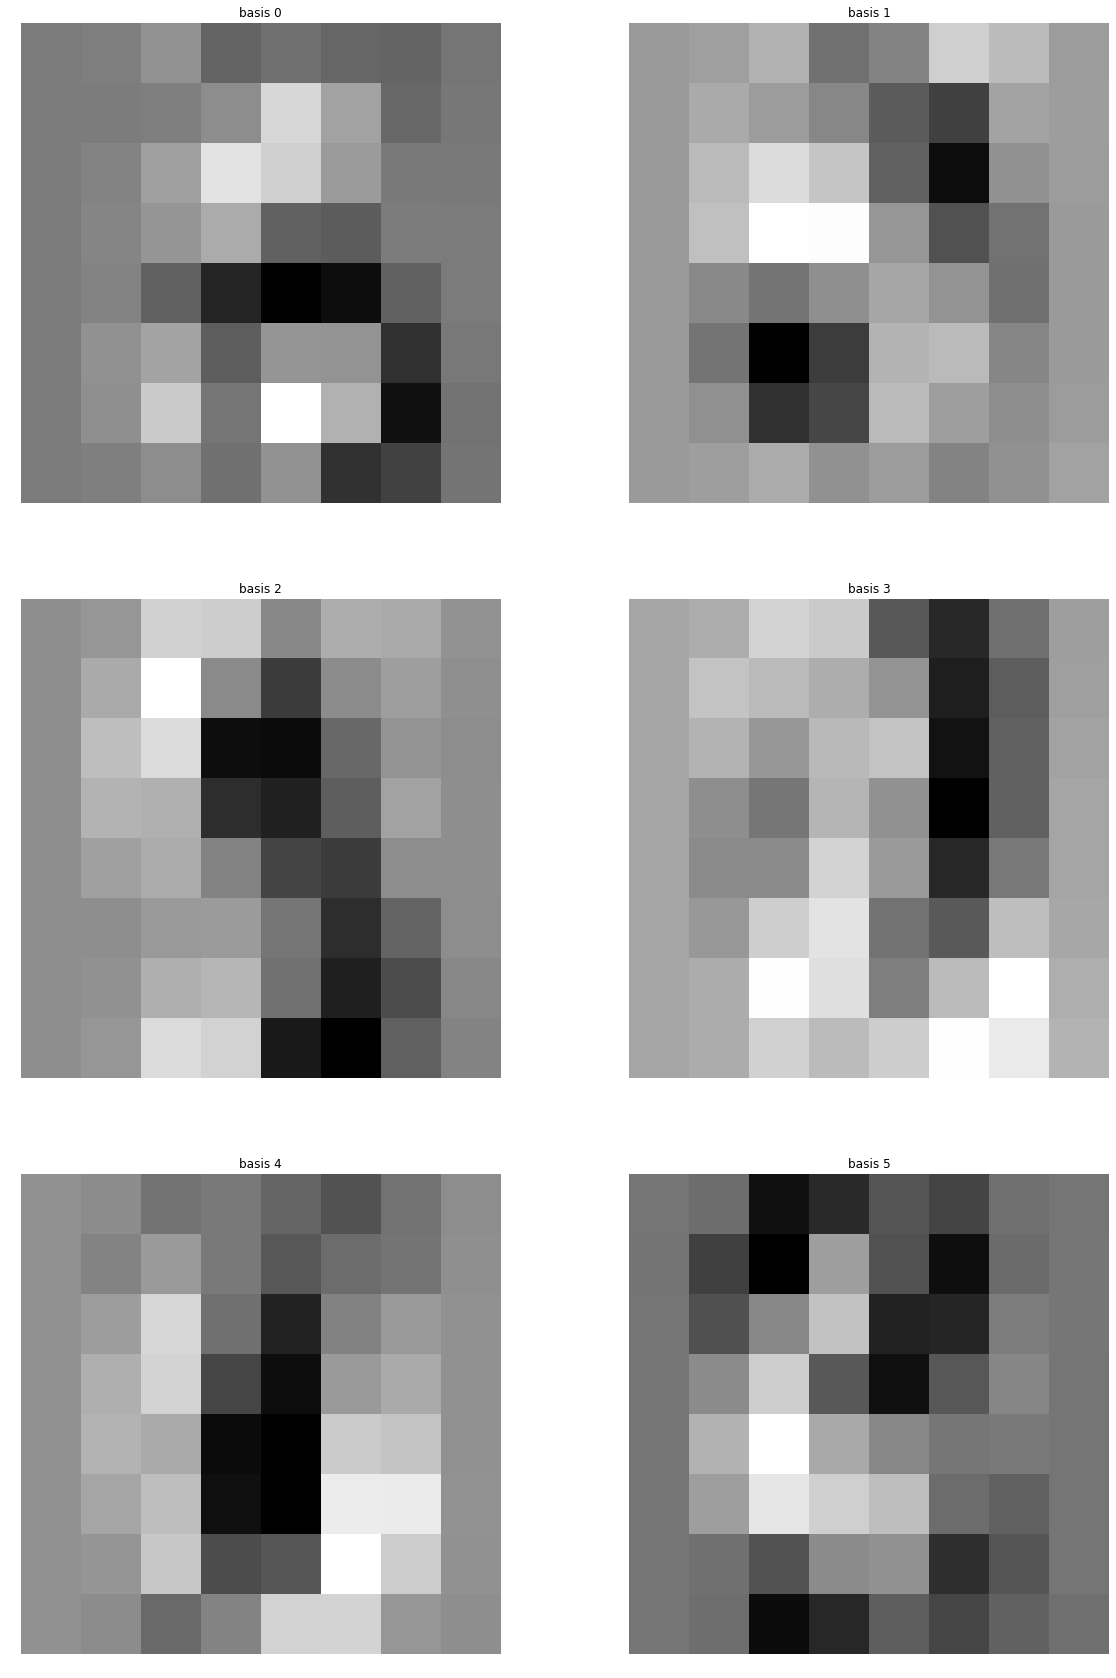

In [118]:
# plot images

plt.figure(figsize=[20,30])
gs = mpl.gridspec.GridSpec(3, 2)

for i in range(6):
    plt.subplot(gs[i])
    plt.title('basis '+ str(i))
    plt.imshow(svd_basis[i],cmap = 'binary')
    plt.axis('off')

### (ii) NMF

In [84]:
# apply nmf
model = decomposition.NMF(n_components=10, init='random', random_state=0)
Z = model.fit_transform(X)
H = model.components_

# select best basis
nmf_basis = (H[np.argsort(np.sum(Z,axis=0))[-6:]]).reshape([6,8,8])

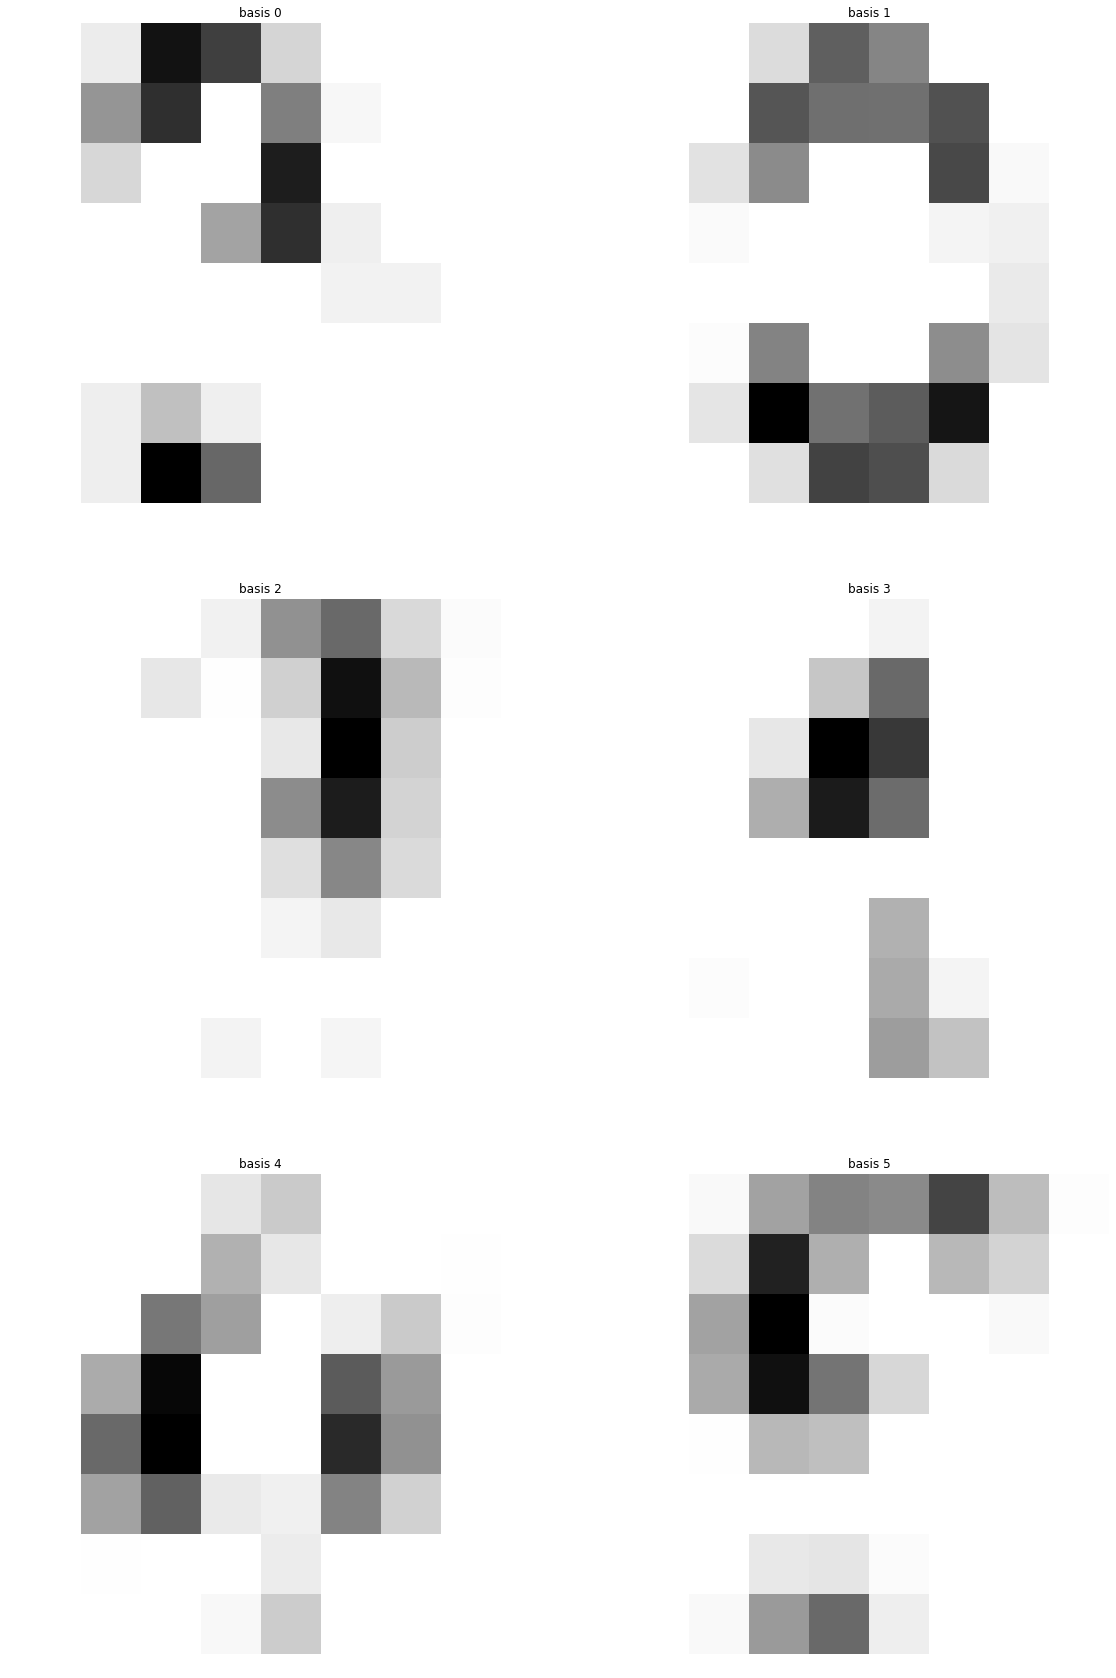

In [104]:
# plot images

plt.figure(figsize=[20,30])
gs = mpl.gridspec.GridSpec(3, 2)

for i in range(6):
    plt.subplot(gs[i])
    plt.title('basis '+ str(i))
    plt.imshow(nmf_basis[i],cmap = 'binary')
    plt.axis('off')

### Comments

The most eyecatching difference between svd and nmf is, that the svd basis have both positive and negative values, whereas the nmf basis consist only of positive values.
The nmf appears to recreate parts of the chiffres, wheras svd seems to give larger patterns, like gradients from one side to the other.

### 2.2 Implementation

## 3 Recommender system

In [121]:
import pandas as pd # install pandas via conda

# column headers for the dataset
ratings_cols = ['user id ','movie id ','rating ','timestamp ']
movies_cols = ['movie id ','movie title ','release date ',
'video release date ','IMDb URL ','unknown ','Action ',
'Adventure ','Animation ','Childrens ','Comedy ','Crime ',
'Documentary ','Drama ','Fantasy ','Film - Noir ','Horror ',
'Musical ','Mystery ','Romance ','Sci -Fi ','Thriller ',
'War ' ,'Western ']
users_cols = ['user id ','age ','gender ','occupation ',
'zip code ']
users = pd. read_csv ('ml-100k/u.user', sep='|',
names = users_cols , encoding ='latin -1 ')
movies = pd. read_csv ('ml-100k/u.item', sep='|',
names = movies_cols , encoding ='latin -1 ')
ratings = pd. read_csv ('ml-100k/u.data ', sep='\t',
names = ratings_cols , encoding ='latin -1 ')

# peek at the dataframes , if you like :)
users.head()
movies.head()
ratings.head()

# create a joint ratings dataframe for the matrix
fill_value = 0
rat_df = ratings . pivot ( index = 'user id ',
columns ='movie id ', values = 'rating '). fillna ( fill_value )
rat_df.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
# movies.iloc[np.where(movies['Sci -Fi '] + movies['Thriller ']==2)[0]]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film - Noir,Horror,Musical,Mystery,Romance,Sci -Fi,Thriller,War,Western
37,38,"Net, The (1995)",01-Jan-1995,NaN,"http://us.imdb.com/M/title-exact?Net,%20The%20...",0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
95,96,Terminator 2: Judgment Day (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Terminator%20...,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
134,135,2001: A Space Odyssey (1968),01-Jan-1968,NaN,http://us.imdb.com/M/title-exact?2001:%20A%20S...,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
144,145,"Lawnmower Man, The (1992)",01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Lawnmower%20M...,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
163,164,"Abyss, The (1989)",01-Jan-1989,NaN,"http://us.imdb.com/M/title-exact?Abyss,%20The%...",0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
175,176,Aliens (1986),01-Jan-1986,NaN,http://us.imdb.com/M/title-exact?Aliens%20(1986),0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
182,183,Alien (1979),01-Jan-1979,NaN,http://us.imdb.com/M/title-exact?Alien%20(1979),0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
194,195,"Terminator, The (1984)",01-Jan-1984,NaN,"http://us.imdb.com/M/title-exact?Terminator,%2...",0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
205,206,Akira (1988),01-Jan-1988,NaN,http://us.imdb.com/M/title-exact?Akira%20(1988),0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
251,252,"Lost World: Jurassic Park, The (1997)",23-May-1997,NaN,http://us.imdb.com/M/title-exact?Lost%20World%...,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
